# **The Naive-Bayes Classifier**

To implement a Bayesian classifier it is necessary to estimate the **probability density functions** $p(x | \omega_i), i=1,2,\ldots,M$, which correspond to **multivariate distributions** since
$$x\in \mathbb{R}^l$$

In order to sato safeguard good estimates of the pdfs the **number of training samples**, $N$, must be large enough. To this end, the demand for data increases exponentially fast with the **dimension of the feature space** $l$.

> Crudely speaking, if N could be regarded as a good number of training data points for obtaining sufficiently accurate estimates of a pdf in an one-dimensional space, then $N^l$ points would be required for an $l$-dimensional space.

> Thus, large values of $l$ make the accurate **estimation of a multidimensional pdf** a bit of an *illusion* since in practice data is hard to obtain.



To resolve this issue, concessions can be made about the degree of accuracy that is expected from the **pdf estimates**.

One widely used approach is to assume that **individual features** (components of the random vector) $x_j, \ j=1,2,\ldots,l$, are **statistically independent**.

Under this assumption, we can write

$$p(x|\omega_i) = \prod_{j=1}^{l} p(x_j|\omega_i), \qquad i=1,2,\ldots,M$$

The scenario is now different. To **estimate $l$ one-dimensional pdfs, for each of the classes**, $lN$ data points would be enough in order to obtain good estimates, instead of $N^l$ . This leads to the so-called naive-Bayes classifier, which assigns an unknown sample $x=[x_1,x_2,\ldots,x_l]^T$ to the class (**Naive-Bayes Classifier**):
$$\omega_m = \arg \max_{\omega_i} \prod_{j=1}^l p(x_k|\omega_i), \qquad i=1,2,\ldots,M$$

In practices, the **naive-Bayes classifier** can be very **robust** to violations of its **independence assumption**, and it has been reported to perform well many real-world data sets.

## *Examples**

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.datasets import load_iris
from scipy import stats

In [2]:
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]

In [3]:
var_x = "sepal length (cm)"
var_y = "sepal width (cm)"
colors=["red", "blue", "darkgreen"]

In [4]:
def draw_kde(df, var_x, var_y, colors, size=20):
    g = sns.jointplot(data=df, x=var_x, y=var_y,
                hue="target", palette=colors, s=size)
    plt.show()

In [5]:
def draw_normal(df, var_x, var_y, colors, size=20):
  w = {i: df[df["target"] == i] for i in range(3)}
  g = sns.JointGrid(data=df, x=var_x, y=var_y)
  sns.scatterplot(data=df, x=var_x, y=var_y, hue="target",
                  palette=colors, linewidth=1.5, ax=g.ax_joint, s=size)
  for var, axis in zip([var_x, var_y], [g.ax_marg_x, g.ax_marg_y]):
      for i in range(3):
          mean = np.mean(w[i][var])
          std = np.std(w[i][var])

          x_vals = np.linspace(df[var].min(), df[var].max(), 100)
          y_vals = stats.norm.pdf(x_vals, mean, std)

          if var == var_x:
              axis.plot(x_vals, y_vals, color=colors[i])
          else:
              axis.plot(y_vals, x_vals, color=colors[i])
  g.set_axis_labels(var_x, var_y)
  plt.show()

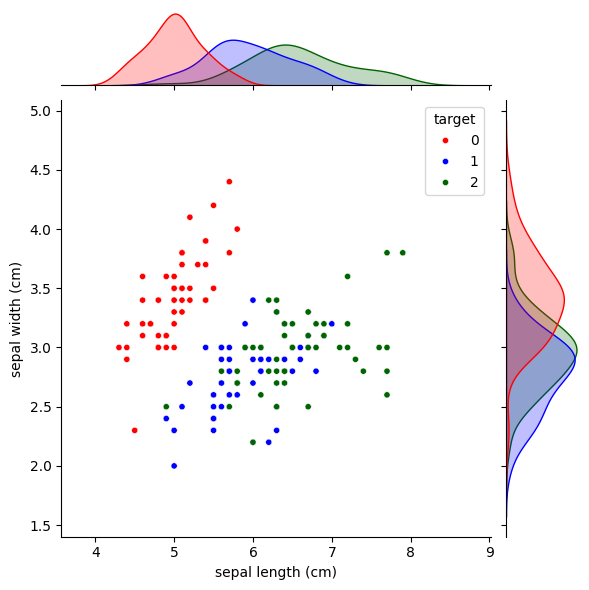

In [6]:
draw_kde(df, var_x, var_y, colors)

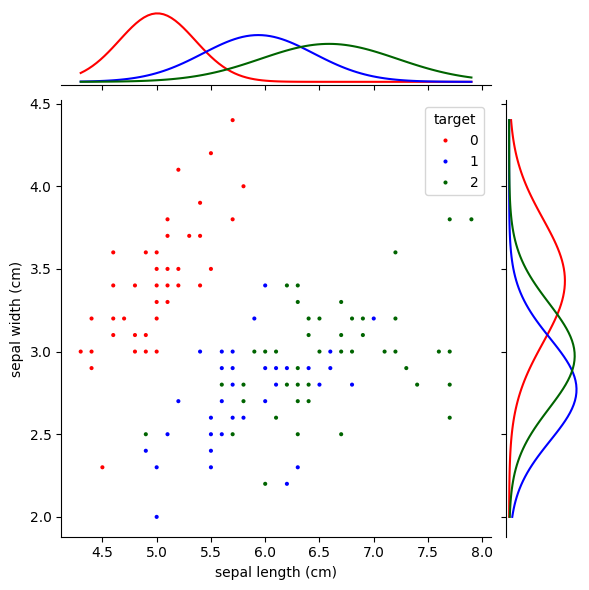

In [7]:
draw_normal(df, var_x, var_y, colors)

## **Exercise**

In [8]:
X = np.array([[0, 0], #Clase 1
              [0, 3],
              [2, 4],
              [2, 1],
              [3, 1], #Clase 2
              [4, 2],
              [4, 3],
              [5, 2],
              [5, 1],
              [3, 3],
              [5, 3],
              [3, 2],
              [4, 1],
              [0, 4], # Clase 3
              [0, 6],
              [4, 6],
              [4, 4]
              ])
y = np.array([0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2])
df2 = pd.DataFrame(X, columns=["x", "y"])
df2["target"] = y

In [9]:
len(X)

17

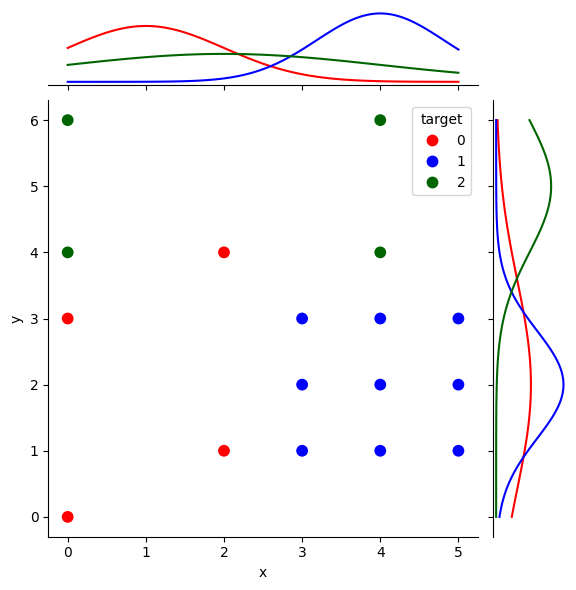

In [10]:
draw_normal(df2, "x", "y", colors, 100)

In [11]:
classes = np.unique(y)
means = [np.mean(X[y == c], axis=0) for c in classes]
covs = [np.cov(X[y == c].T) for c in classes]

In [12]:
for i in range(3):
  print(means[i])
  print(covs[i])

[1. 2.]
[[1.33333333 0.66666667]
 [0.66666667 3.33333333]]
[4. 2.]
[[0.75 0.  ]
 [0.   0.75]]
[2. 5.]
[[5.33333333 0.        ]
 [0.         1.33333333]]
